# Selecting a performance measure

In this notebook, we're working on the concrete dataset, which includes numerical attributes only. A good performance measure would be the `root mean squared error` (RMSE) averaged over all the predicted columns.

# Download the data

In [187]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("elikplim/concrete-compressive-strength-data-set")

# print("Path to dataset files:", path)

## Take a quick look at the data

In [188]:
import pandas as pd

concrete_df = pd.read_csv("C:/Users/imoua/.cache/kagglehub/datasets/elikplim/concrete-compressive-strength-data-set/versions/1/concrete_data.csv")
concrete_df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [189]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [190]:
concrete_df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [191]:
concrete_df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


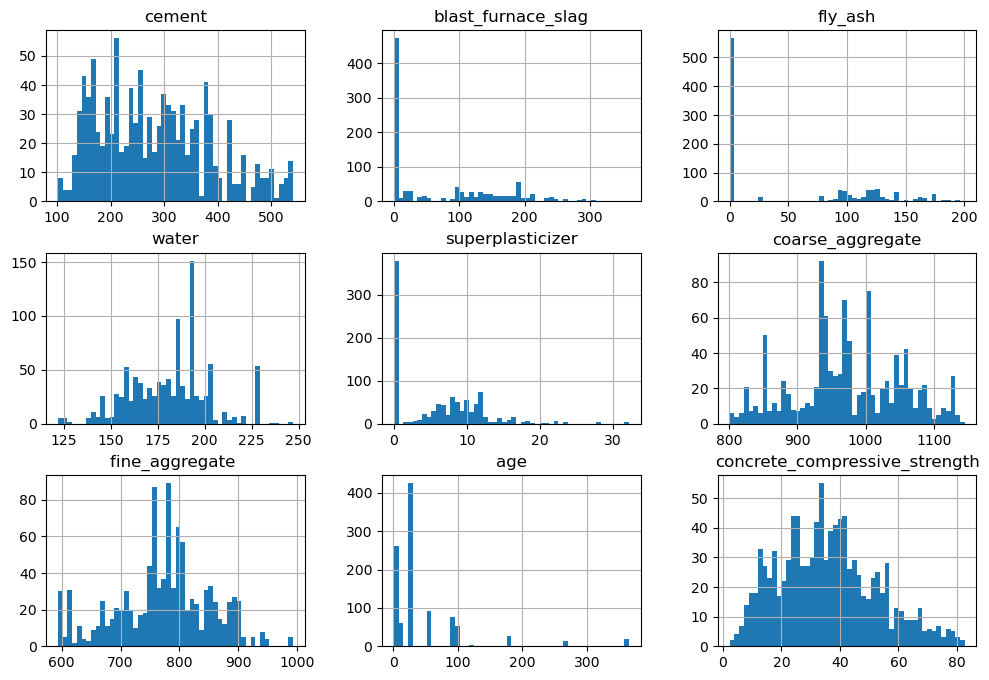

In [192]:
import matplotlib.pyplot as plt

concrete_df.hist(bins=50, figsize=(12,8))
plt.show()

# Create a Test set


In [193]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(concrete_df, test_size=0.4)

In [194]:
train_set_clean = train_set.copy()

In [195]:
from gain_utils import MCAR2unifo

train_set = MCAR2unifo(train_set.values, 50)
train_set = pd.DataFrame(train_set, columns=train_set_clean.columns)

c:\Users\imoua\OneDrive\Bureau\bi\projet_BI\gain_utils.py:239: UserWarning: PATTERNS at risk of being all NaN: 10
  warnings.warn(f"PATTERNS at risk of being all NaN: {nPatternsRisk}")


In [196]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         301 non-null    float64
 1   blast_furnace_slag             315 non-null    float64
 2   fly_ash                        307 non-null    float64
 3   water                          318 non-null    float64
 4   superplasticizer               325 non-null    float64
 5   coarse_aggregate               302 non-null    float64
 6   fine_aggregate                 314 non-null    float64
 7   age                            299 non-null    float64
 8   concrete_compressive_strength  300 non-null    float64
dtypes: float64(9)
memory usage: 43.6 KB


In [197]:
# from gain_utils import missing_method

# train_set, mask = missing_method(train_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)

# train_set.info()

# Prepare Data for ML algorithms


In [198]:
# preprocessing pipeline with standardscaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

# Fit and transform the data
preprocessed_train_set = preprocessing_pipeline.fit_transform(train_set)

# Convert the result back to a DataFrame for easier inspection
preprocessed_train_set_df = pd.DataFrame(preprocessed_train_set, columns=concrete_df.columns)
preprocessed_train_set_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,-1.045290,-0.420125,1.062552,NaN,NaN,1.383936,NaN,NaN,NaN
1,NaN,2.597154,-0.852702,NaN,-1.018677,NaN,NaN,0.719997,NaN
2,1.137532,NaN,-0.852702,NaN,-1.018677,0.689382,-0.304742,-0.279053,NaN
3,NaN,NaN,-0.852702,NaN,NaN,NaN,NaN,3.620465,NaN
4,0.063595,NaN,NaN,-1.68558,NaN,NaN,0.433048,-0.617441,0.147564
...,...,...,...,...,...,...,...,...,...
613,1.572018,NaN,NaN,-0.90728,0.883836,-0.032556,-0.719512,NaN,NaN
614,NaN,NaN,0.597220,NaN,0.129391,NaN,NaN,NaN,-0.624687
615,NaN,-0.904082,0.934663,NaN,0.621420,-1.887191,0.549937,-0.279053,NaN
616,NaN,NaN,NaN,NaN,-1.018677,0.074490,-0.963347,-0.617441,NaN


In [199]:
preprocessed_train_set_df = pd.DataFrame(preprocessed_train_set, columns=concrete_df.columns)
preprocessed_train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         301 non-null    float64
 1   blast_furnace_slag             315 non-null    float64
 2   fly_ash                        307 non-null    float64
 3   water                          318 non-null    float64
 4   superplasticizer               325 non-null    float64
 5   coarse_aggregate               302 non-null    float64
 6   fine_aggregate                 314 non-null    float64
 7   age                            299 non-null    float64
 8   concrete_compressive_strength  300 non-null    float64
dtypes: float64(9)
memory usage: 43.6 KB


In [200]:
preprocessed_train_set_clean = preprocessing_pipeline.transform(train_set_clean)

In [201]:
from improved_gain import GAINImputer
data_x = preprocessed_train_set.copy()
gain_parameters = {
    'batch_size': 4,
    'hint_rate': 0.9,
    'alpha': 1,
    'iterations': 5000
}

gain_imputer = GAINImputer(gain_parameters=gain_parameters)
imputed_data = gain_imputer.fit_transform(data_x)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 3/5000 [00:02<55:33,  1.50it/s]  

Iteration 1/5000 - D_loss: 0.7149, G_loss: 1.5149, MSE_loss: 1.0559


 20%|██        | 1011/5000 [00:15<01:07, 58.91it/s]

Iteration 1001/5000 - D_loss: 0.6908, G_loss: 1.0844, MSE_loss: 0.7350


 40%|████      | 2010/5000 [00:28<00:38, 77.93it/s] 

Iteration 2001/5000 - D_loss: 0.7134, G_loss: 1.2574, MSE_loss: 0.9998


 60%|██████    | 3013/5000 [00:41<00:26, 76.12it/s]

Iteration 3001/5000 - D_loss: 0.6817, G_loss: 1.0124, MSE_loss: 0.7080


 80%|████████  | 4018/5000 [00:54<00:11, 83.74it/s]

Iteration 4001/5000 - D_loss: 0.6904, G_loss: 1.1288, MSE_loss: 0.6378


100%|██████████| 5000/5000 [01:07<00:00, 74.31it/s]


In [202]:
imputed_data_df = pd.DataFrame(imputed_data, columns=preprocessed_train_set_df.columns)
imputed_data_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,-1.045290,-0.420125,1.062552,0.00000,0.000000,1.383936,0.000000,0.0,0.000000
1,0.000000,2.597154,-0.852702,0.00000,-1.018677,0.000000,0.000000,1.0,0.000000
2,1.137532,0.000000,-0.852702,0.00000,-1.018677,0.689382,-0.304742,-0.0,0.000000
3,0.000000,0.000000,-0.852702,0.00000,0.000000,0.000000,0.000000,4.0,0.000000
4,0.063595,0.000000,0.000000,-1.68558,0.000000,0.000000,0.433048,-1.0,0.147564
...,...,...,...,...,...,...,...,...,...
613,1.572018,0.000000,0.000000,-0.90728,0.883836,-0.032556,-0.719512,0.0,0.000000
614,0.000000,0.000000,0.597220,0.00000,0.129391,0.000000,0.000000,0.0,-0.624687
615,0.000000,-0.904082,0.934663,0.00000,0.621420,-1.887191,0.549937,-0.0,0.000000
616,0.000000,0.000000,0.000000,0.00000,-1.018677,0.074490,-0.963347,-1.0,0.000000


In [203]:
imputed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         618 non-null    float64
 1   blast_furnace_slag             618 non-null    float64
 2   fly_ash                        618 non-null    float64
 3   water                          618 non-null    float64
 4   superplasticizer               618 non-null    float64
 5   coarse_aggregate               618 non-null    float64
 6   fine_aggregate                 618 non-null    float64
 7   age                            618 non-null    float64
 8   concrete_compressive_strength  618 non-null    float64
dtypes: float64(9)
memory usage: 43.6 KB


In [204]:
from gain_utils import imputation_rmse
import numpy as np

missing_mask = np.isnan(preprocessed_train_set)

imputation_rmse(preprocessed_train_set_clean, imputed_data, missing_mask)

{'rmse': 0.9955185218531227,
 'mae': 0.8031993600036232,
 'total_missing': 2781,
 'missing_percentage': 50.0,
 'min_error': 2.7158141218486573,
 'max_error': 5.151267526618736,
 'std_error': 0.9955159595406918}

In [205]:
test_set_clean = test_set.copy()

In [206]:
test_set = MCAR2unifo(test_set.values, 50)
test_set = pd.DataFrame(test_set, columns=test_set_clean.columns)

c:\Users\imoua\OneDrive\Bureau\bi\projet_BI\gain_utils.py:239: UserWarning: PATTERNS at risk of being all NaN: 5
  warnings.warn(f"PATTERNS at risk of being all NaN: {nPatternsRisk}")


In [207]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         216 non-null    float64
 1   blast_furnace_slag             186 non-null    float64
 2   fly_ash                        203 non-null    float64
 3   water                          197 non-null    float64
 4   superplasticizer               220 non-null    float64
 5   coarse_aggregate               196 non-null    float64
 6   fine_aggregate                 223 non-null    float64
 7   age                            208 non-null    float64
 8   concrete_compressive_strength  205 non-null    float64
dtypes: float64(9)
memory usage: 29.1 KB


In [208]:
# test_set, mask = missing_method(test_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)

# test_set.info()

In [209]:
# Preprocess the test set

preprocessed_test_set = preprocessing_pipeline.transform(test_set)
preprocessed_test_set_clean = preprocessing_pipeline.transform(test_set_clean)

In [210]:
# Impute missing values in the test set

imputed_test_set = gain_imputer.transform(preprocessed_test_set.copy())

In [211]:
# Compute the RMSE of the imputed test set

missing_mask_test = np.isnan(preprocessed_test_set)

# Check if there are any missing values in the preprocessed_test_set
if missing_mask_test.any():
	rmse = imputation_rmse(preprocessed_test_set_clean, imputed_test_set, missing_mask_test)
	print(f"RMSE: {rmse}")
else:
	print("No missing values in the preprocessed_test_set to compute RMSE.")

RMSE: {'rmse': 0.9965642797781885, 'mae': 0.8138816875276925, 'total_missing': 1854, 'missing_percentage': 50.0, 'min_error': 2.973348153599948, 'max_error': 5.151267526618736, 'std_error': 0.9627110849735687}


In [214]:
import matplotlib.pyplot as plt

def plot_rmse_repeated_runs(runs, model1_rmse, model2_rmse, model3_rmse, model4_rmse, model1_label="Model 1", model2_label="Model 2", model3_label="Model 3", model4_label="Model 4"):
    """
    Plots RMSE values of four models across multiple runs.

    Parameters:
    - runs: List of run numbers (e.g., [1, 2, 3, ..., N]).
    - model1_rmse: List of RMSE values for the first model corresponding to the runs.
    - model2_rmse: List of RMSE values for the second model.
    - model3_rmse: List of RMSE values for the third model.
    - model4_rmse: List of RMSE values for the fourth model.
    - model1_label: Label for the first model in the legend.
    - model2_label: Label for the second model in the legend.
    - model3_label: Label for the third model in the legend.
    - model4_label: Label for the fourth model in the legend.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(runs, model1_rmse, marker='o', label=model1_label, linestyle='-')
    plt.plot(runs, model2_rmse, marker='s', label=model2_label, linestyle='--')
    plt.plot(runs, model3_rmse, marker='^', label=model3_label, linestyle=':')
    plt.plot(runs, model4_rmse, marker='d', label=model4_label, linestyle='-.')
    
    plt.title("RMSE Across Repeated Runs - Concrete Dataset")
    plt.xlabel("Run")
    plt.ylabel("RMSE")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.xticks(runs)
    plt.tight_layout()
    
    plt.show()

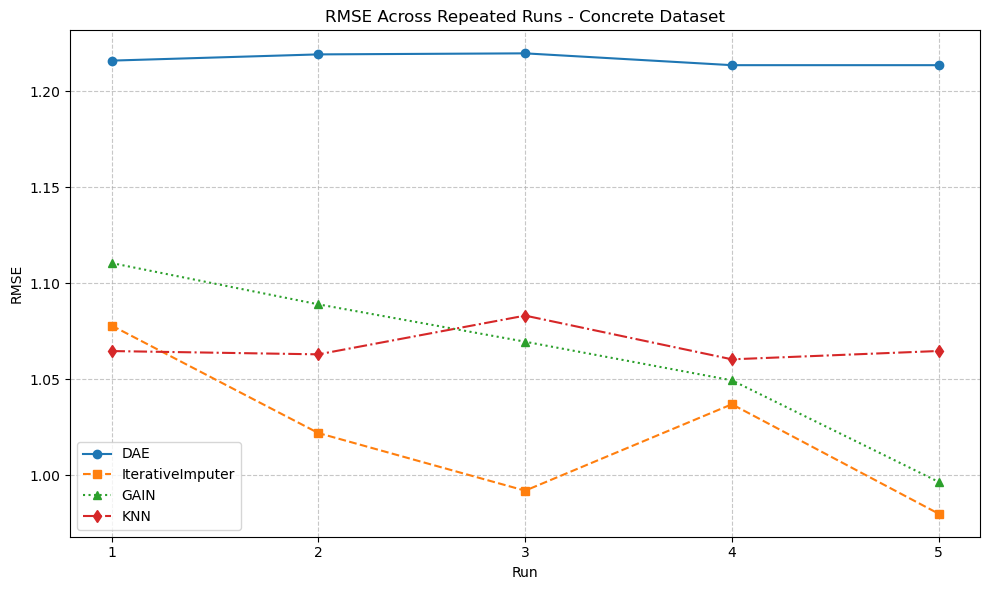

In [216]:
dae = [1.21597764, 1.21922226, 1.21976356, 1.21360731, 1.21360731]
missforest =  [1.078, 1.022, 0.992, 1.037, 0.98]
gan = [1.1105488983300151, 1.0890408275324, 1.069578745538796, 1.0494645091993844, 0.9965642797781885]
knn = [1.0647126414731174, 1.0630003019285634, 1.0831772258354333,1.0604072260688782,1.0647428782639163]

plot_rmse_repeated_runs([1, 2, 3, 4, 5], dae, missforest, gan, knn, model1_label="DAE", model2_label="IterativeImputer", model3_label="GAIN", model4_label="KNN")

In [12]:
import numpy as np
import pandas as pd
dae = {
    "Diabetes": [0.24836013, 0.24754275, 0.24128455, 0.24437699, 0.242],
    "Concrete": [1.21597764, 1.21922226, 1.21976356, 1.21360731, 1.21360731]
}

missforest = {
    "Diabetes": [1.0671, 1.1207, 1.179, 1.1705, 1.157],
    "Concrete": [1.078, 1.022, 0.992, 1.037, 0.98]
}

gan = {
    "Diabetes": [1.0211490160183752, 1.1040751084511455, 1.061199702813744, 1.139917409253286, 1.054202983358172],
    "Concrete": [1.1105488983300151, 1.0890408275324, 1.069578745538796, 1.0494645091993844, 0.9965642797781885]
}

knn = {
    "Diabetes": [1.151145016615988,1.199448717572291,1.109724386961441,1.2291149293575978,1.1704091421053056],
    "Concrete": [1.0647126414731174, 1.0630003019285634, 1.0831772258354333,1.0604072260688782,1.0647428782639163]
}

# Create a dictionary of the mean and std of RMSE values for each dataset

rmse_dict = {
    "DAE": {
        "mean": [np.mean(dae["Diabetes"]), np.mean(dae["Concrete"])],
        "std": [np.std(dae["Diabetes"]), np.std(dae["Concrete"])]
    },
    "MissForest": {
        "mean": [np.mean(missforest["Diabetes"]), np.mean(missforest["Concrete"])],
        "std": [np.std(missforest["Diabetes"]), np.std(missforest["Concrete"])]
    },
    "GAIN": {
        "mean": [np.mean(gan["Diabetes"]), np.mean(gan["Concrete"])],
        "std": [np.std(gan["Diabetes"]), np.std(gan["Concrete"])]
    },
    "KNN": {
        "mean": [np.mean(knn["Diabetes"]), np.mean(knn["Concrete"])],
        "std": [np.std(knn["Diabetes"]), np.std(knn["Concrete"])]
    }
}
# Create a DataFrame from the rmse_dict
rmse_df = pd.DataFrame({
    "Model": ["DAE", "IterativeImputer", "GAIN", "KNN"],
    "Diabetes Mean RMSE": [rmse_dict["DAE"]["mean"][0], rmse_dict["MissForest"]["mean"][0], rmse_dict["GAIN"]["mean"][0], rmse_dict["KNN"]["mean"][0]],
    "Diabetes Std RMSE": [rmse_dict["DAE"]["std"][0], rmse_dict["MissForest"]["std"][0], rmse_dict["GAIN"]["std"][0], rmse_dict["KNN"]["std"][0]],
    "Concrete Mean RMSE": [rmse_dict["DAE"]["mean"][1], rmse_dict["MissForest"]["mean"][1], rmse_dict["GAIN"]["mean"][1], rmse_dict["KNN"]["mean"][1]],
    "Concrete Std RMSE": [rmse_dict["DAE"]["std"][1], rmse_dict["MissForest"]["std"][1], rmse_dict["GAIN"]["std"][1], rmse_dict["KNN"]["std"][1]]
})

rmse_df

,Model,Diabetes Mean RMSE,Diabetes Std RMSE,Concrete Mean RMSE,Concrete Std RMSE
0,DAE,0.244713,0.002847,1.216436,0.002648
1,IterativeImputer,1.138860,0.041038,1.021800,0.034713
2,GAIN,1.076109,0.041416,1.063039,0.038934
3,KNN,1.171968,0.040820,1.067208,0.008140
